# ETL of MRTS data

**Andrew Buensalida**



# Index

- [Abstract](#Abstract)
- [1. Introduction](#1.-Introduction)
- [2. Extract-Transform-Load](#2.-Extract-Transform-Load)
    - [2.1 The ETL Process](#2.1-The-ETL-Process)
    - [2.2 Data Exploration](#2.2-Data-Exploration)
    - [2.3 Data Preparation](#2.3-Data-Preparation)
    - [2.4 Read the Data Using Python](#2.4-Reading-the-Data-Using-Python)
         - [2.4.1 Reading Sample Data](#2.4.1-Reading-Sample-Data)
         - [2.4.2 Reading the MRST Data](#2.4.2-Reading-the-MRST-Data)
    - [2.5 Writing an Installation Script](#2.5-Writing-an-Installation-Script)
- [3. Analysis and Visualization](#3.-Project-Description)
    - [3.1 Running Queries in MySQL Workbech](#3.1-Running-Queries-in-MySQL-Workbech)
    - [3.2 Running Queries From Python](#3.2-Running-Queries-From-Python)
    - [3.3 Explore Trends](#3.3-Explore-Trends)
    - [3.4 Explore Percentage Change](#3.4-Explore-Percentage-Change)
    - [3.5 Explore Rolling Time Windows](#3.5-Explore-Rolling-Time-Windows)
- [Conclusion](#Conclusion)
- [References](#References)

[Back to top](#Index)


##  Abstract

This is a brief description (150 words or less) of your analysis and the results of your model. Complete this portion of the template after you are done working on your project.

[Back to top](#Index)


## 1. Introduction

Introduce your project using 300 words or less. Describe all the processes you followed to create your ETL, Analysis, and Visualization project. Start by summarizing the steps that you intend to perform and then elaborate on this section after you have completed your project.

[Back to top](#Index)

## 2. Extract-Transform-Load



[Back to top](#Index)

### 2.1 The ETL Process

The key steps to perform ETL on the MRTS dataset are:
- Understand the data
- Create DDL to setup the MySQL database and tables
- Download the xls sheet as a csv
- Import the csv into python
- Reshape the data and insert it into MySQL
- Check if data is inserted using MySQL Workbench, or Python

[Back to top](#Index)

### 2.2 Data Exploration

The MRTS dataset is about sales of different kinds of businesses. It is collected by the U.S. Census Buereau. The dataset the is supplied by the curriculum ranges from 1992 to present and has a monthly interval, whereas the data used by the instructor has a daily interval. 
Monthly estimates are shown in the millions of dollars. Overall, the data seems clean and uniform, except for a few missing values here and there.

[Back to top](#Index)

### 2.3 Data Preparation

- I did not modify the xls file before exporting to csv. The less manual process, the better. 
- I created a google-script-sheet-to-csv.js to convert each tab in the Google Sheet into its own CSV file. (https://stackoverflow.com/questions/28707169/google-spreadsheet-download-all-the-sheets-at-once). This saves the CSV files in Google Drive. 
- When I imported the CSVs into python, I removed the sales data that were surpress (S) and (NA), and empty data. 
- I had to split the NAICS codes by commas. I made an association table between kinds of businesses and NAICS codes, since it has a many to many relationship. 
- I removed the comma in the sales amount and converted it into a float before inserting it into the SQL. 
- I took the year out of the title.

[Back to top](#Index)

### 2.4 Read the Data Using Python

Python can be used to read CSVs like so:

```python
import csv

with open("sample-data.csv", "r") as file:
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        print(row)
```

Alternatively, CSVs can also be imported using pandas.

[Back to top](#Index)

### 2.4.1 Reading Sample Data

The sample dataset that I created is a csv file with columns first_name, last_name, email, phone. It has 6 dummy data records. The print statement will print the following:

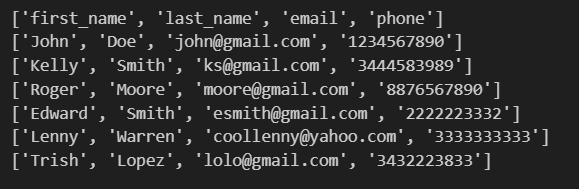

[Back to top](#Index)

### 2.4.2 Reading the MRTS Data

Reading the MRTS CSV file is pretty much the same as reading the sample data set

[Back to top](#Index)

### 2.5 Writing an Installation Script

- First, I connected python to my local MySQL using the mysql.connector library. I used a yaml file to contain the host, user, and password to MySQL. 
- I used DDL to create the database, and the 4 tables: naics_code, kind_of_business, sales, and naics_kind_of_business_association. 
- I then inserted data from the CSV into SQL using INSERT queries.
- I then wrote a python test.py to check if the values were inserted.


[Back to top](#Index)

## 3. Analysis and Visualization



[Back to top](#Index)

### 3.1 Running Queries in MySQL Workbech

The first queries I ran in MySQL Workbench are the general SELECT queries like so:

```sql
SELECT * FROM sales;
SELECT * FROM kind_of_business;
SELECT * FROM naics_code;
SELECT * FROM naics_kind_of_business_association;
```

This is to ensure the data got inserted in the tables.

[Back to top](#Index)

### 3.2 Running Queries From Python

The queries are pretty much the same in Python, except there are additional steps. 
- First import mysql connector, then connect to the database using username, password, etc. 
- Next create a cursor, then use that to execute queries like USE database_name, SELECT, etc. When performing a SELECT, you need to fetchall() on the cursor to get the rows. For example:

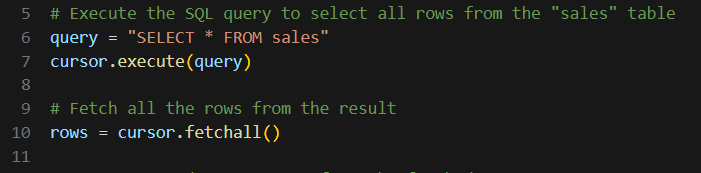

[Back to top](#Index)

### 3.3 Explore Trends

The first query I did was selecting all sales from all kinds of businesses from all the years. This is to get a general feel of the trend. It turns out that sales has been increasing over the years for most business kinds. There also is an uptick and down tick every winter season.
I also joined sales with kind_of_business so that kind_of_business won't just be a foreign key, it will be a string.


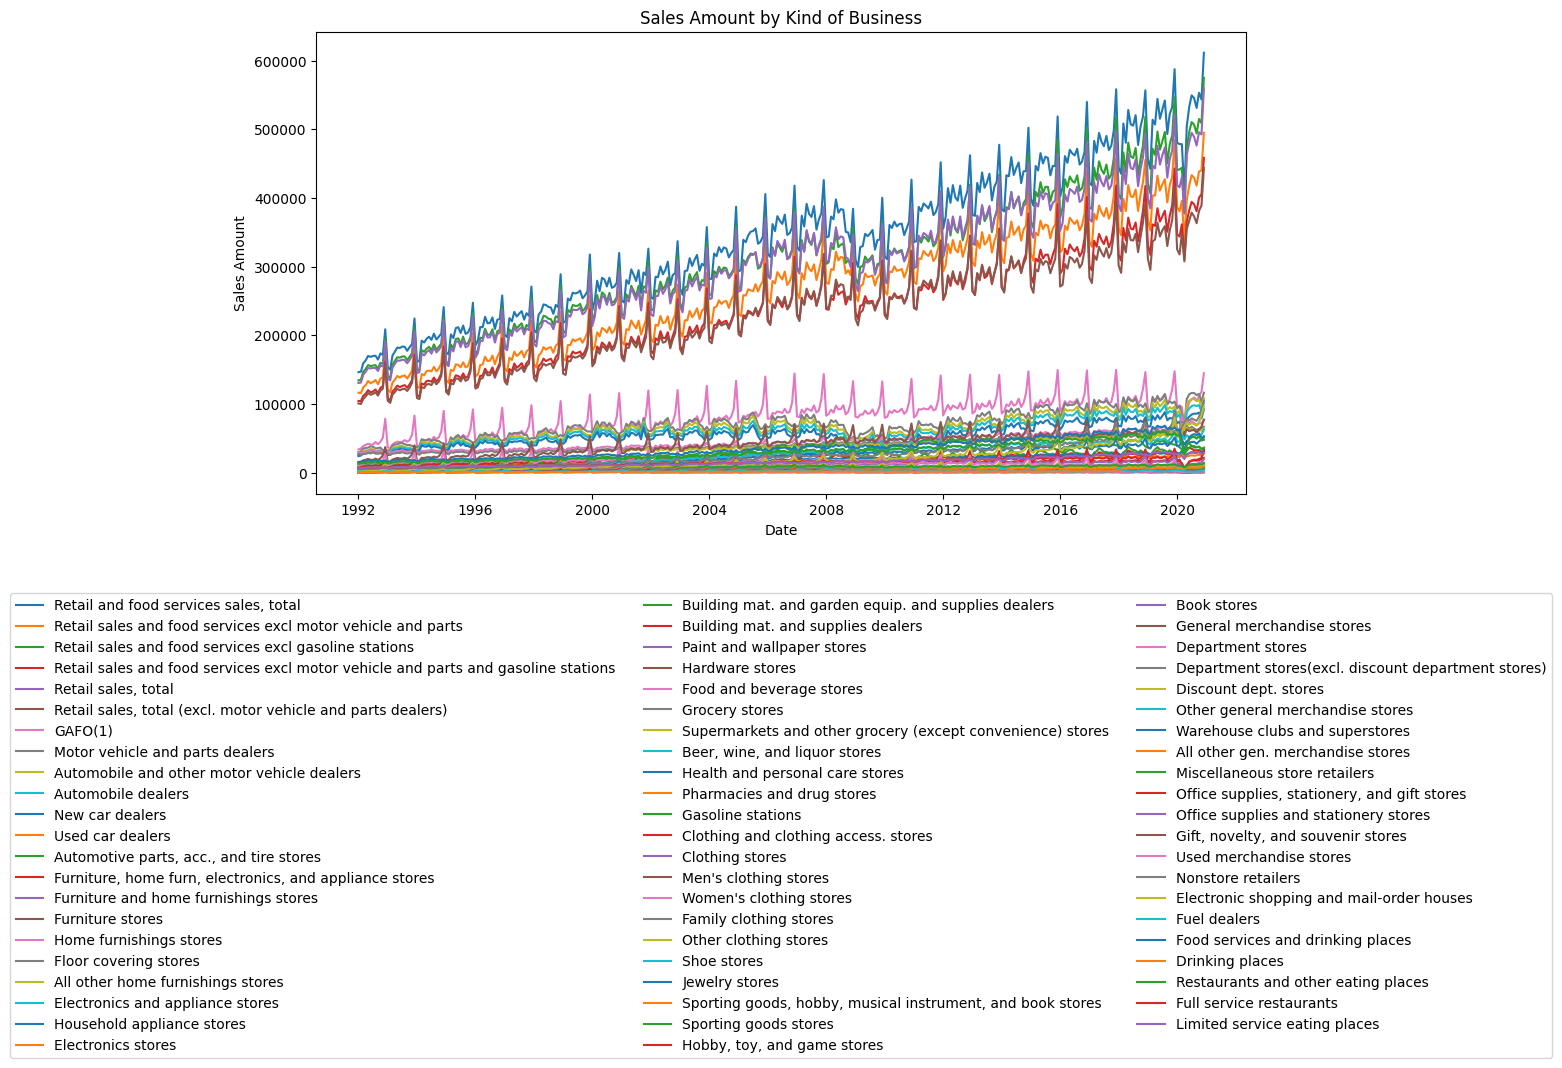

Describe which *queries* you wrote the explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- What is an economic trend and why is it considered an important measure to predict quantities, like spending patterns?
- What is the trend of the retail and food services categories? Can this data be displayed clearly or do you need to adjust some parameters to reduce extraneous details and be able to visualize a clean trend?


- When comparing businesses like bookstores, sporting goods stores, and hobbies, toys, and games stores, what is the highest trend of all of these options? Which one grew faster?

To answer this, I filtered the dataframe to only include these three kind of businesses: 
  - "Book stores",
  - "Sporting goods stores",
  - "Hobby, toy, and game stores"

Visually, we can see Sporting goods stores have a higher overall sales amount, and a higher percentage change, which means it grew faster. Actually, Book stores, looks like it was slightly increasing, but in the past 10 years have been slightly declining. Hobby, toy, and game stores have been very slightly increasing. All 3 categories look like they took a small dip in the begining of 2020. 

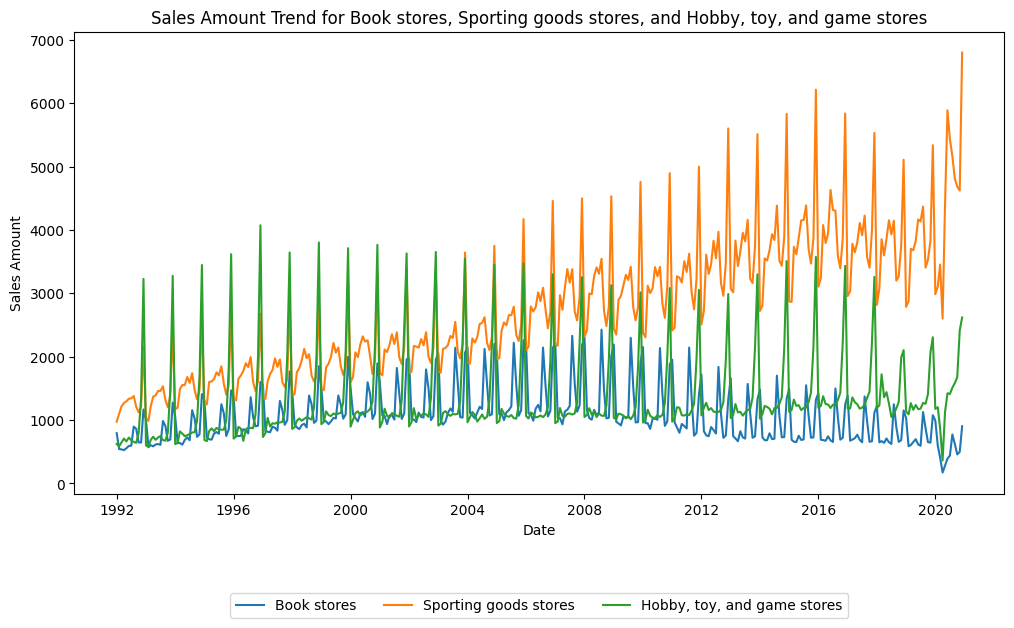

Is there a seasonal pattern? Were there any changes in 2020? Which is better, monthly or yearly? 



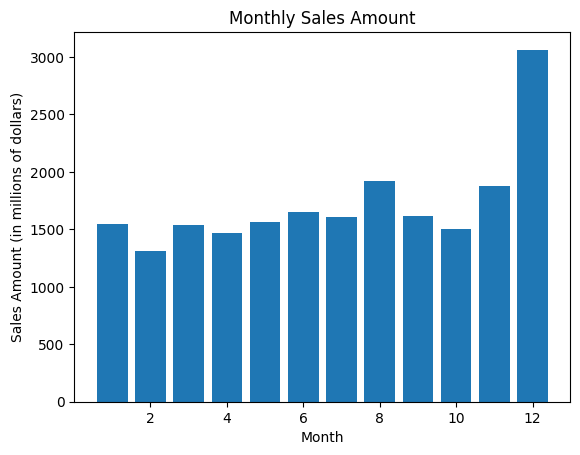


[Back to top](#Index)

### 3.4 Explore Percentage Change

Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission make sure to answer the following:

- In economics, what is the percentage change and why is it considered an important measure to predict quantities like spending patterns?
- Consider the women's clothing and men's clothing businesses and their percentage change. How are these two businesses related? For each of the two businesses, what is the percentage of contribution to the whole and how does it change over time?

[Back to top](#Index)

### 3.5 Explore Rolling Time Windows


Describe which *queries* you wrote to explore the differences in trends between various categories in your data.

In your submission, make sure to answer the following:

- In economics, what is the rolling time window and why is it considered an important measure to predict quantities like spending patterns?
- Consider at least two businesses of your own from the MRTS data. Which *queries* did you write to analyze and produce graphs of rolling time windows for the chosen categories?

[Back to top](#Index)

## Conclusion

Describe your conclusions. Which one of the businesses considered seems like it's going to attract the least spending? Which business seems likely to attract the most spending? 





[Back to top](#Index
)
## References

Add all references you used to complete this project.

Use this format for articles:
- Author Last Name, Author First Name. “Article Title.” Journal Title Volume #, no. Issue # (year): page range.

- Ex: Doe, John. “Data Engineering.” Data Engineering Journal 18, no. 4 (2021): 12-18.

Use this format for websites:
- Author Last Name, Author First Name. “Title of Web Page.” Name of Website. Publishing organization, publication or revision date if available. Access date if no other date is available. URL .

- Doe, John. “Data Engineering.” Data Engineer Resource. Cengage, 2021. www.dataengineerresource.com .
